In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Utilities import *

In [2]:
df = pd.read_hdf("/storage/shared/data/2lep_df_forML_bkg_signal_fromRDF.hdf5")
df_data = pd.read_hdf("/storage/shared/data/2lep_df_forML_data_fromRDF.hdf5")
print(df.keys())

Index(['njet20', 'njet60', 'nbjet60', 'nbjet70', 'nbjet77', 'nbjet85', 'isOS',
       'isSF', 'mll', 'mt2', 'met_et', 'met_phi', 'lep1_flav', 'lep1_pt',
       'lep1_eta', 'lep1_phi', 'lep1_E', 'lep1_ptcone30', 'lep1_etcone20',
       'lep1_trackd0pvunbiased', 'lep1_tracksigd0pvunbiased', 'lep1_isTightID',
       'lep1_z0', 'lep2_flav', 'lep2_pt', 'lep2_eta', 'lep2_phi', 'lep2_E',
       'lep2_ptcone30', 'lep2_etcone20', 'lep2_trackd0pvunbiased',
       'lep2_tracksigd0pvunbiased', 'lep2_isTightID', 'lep2_z0',
       'channelNumber', 'costhstar', 'weight', 'category', 'physdescr'],
      dtype='object')


In [3]:
otherCategories = [ 'Wjets' , 'singleTop', 'Higgs']

for cat in otherCategories:
    df.loc[df["category"] == cat,"category"] = "Other"

df_weight = df.weight

In [4]:
cats = ['Other' ,'Diboson' , 'ttbar', 'Zjets','topX', 'SUSYSlepSlep']

In [5]:
df_pt1 = []
df_pt2 = []
df_mep = []
df_mll = []
df_mt2 = []
df_bTag = []
nr_events = []
weights = []

for i in range(len(cats)):
    index = df["category"] == cats[i]
    df_cat = df[index]
    weights.append(df_weight[index])
    df_pt1.append(df_cat["lep1_pt"].ravel()/1000)
    df_pt2.append(df_cat["lep2_pt"].ravel()/1000)
    df_mep.append(df_cat["met_et"].ravel()/1000)
    df_mll.append(df_cat["mll"].ravel()/1000)
    df_mt2.append(df_cat["mt2"].ravel()/1000)
    df_bTag.append(df_cat["nbjet77"].ravel())
    nr_events.append(len(df_cat))
    
    print(f"Nr of {cats[i]} events: {nr_events[i]}")

print(nr_events)
sort_indx = sorted(range(len(nr_events)), key=lambda k: nr_events[k])


df_pt1 = [df_pt1[i] for i in sort_indx]
df_pt2 = [df_pt2[i] for i in sort_indx]
df_mep = [df_mep[i] for i in sort_indx]
df_mll = [df_mll[i] for i in sort_indx]
df_mt2 = [df_mt2[i] for i in sort_indx]
df_bTag = [df_bTag[i] for i in sort_indx]
cats = [cats[i] for i in sort_indx]
weights = [weights[i] for i in sort_indx]


Nr of Other events: 2904964
Nr of Diboson events: 12962832
Nr of ttbar events: 2468817
Nr of Zjets events: 43969571
Nr of topX events: 1335954
Nr of SUSYSlepSlep events: 86383
[2904964, 12962832, 2468817, 43969571, 1335954, 86383]


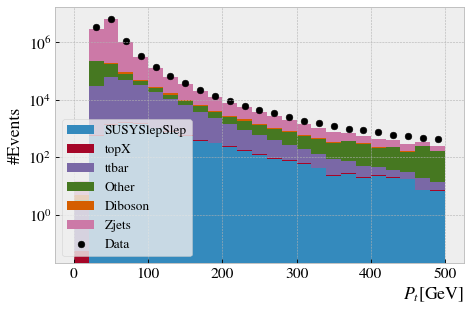

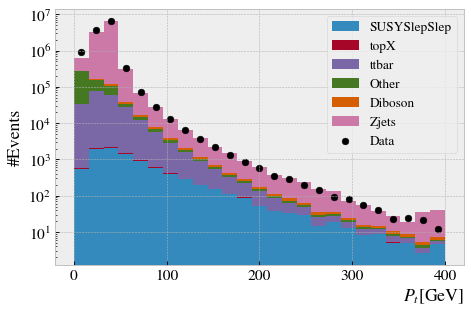

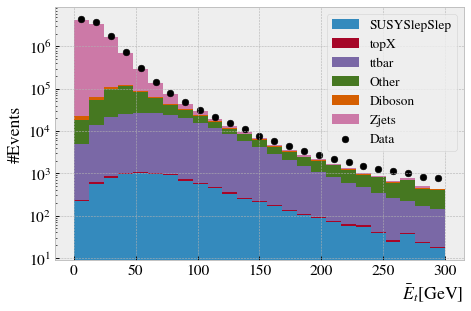

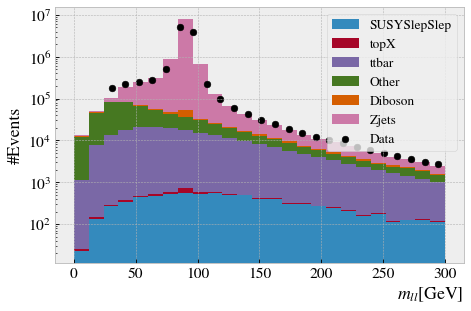

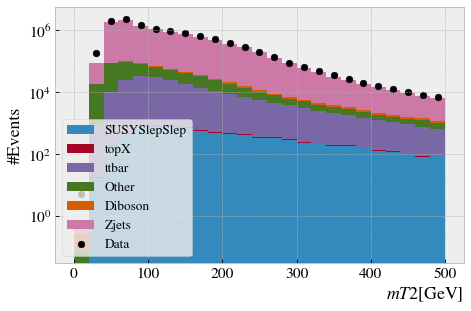

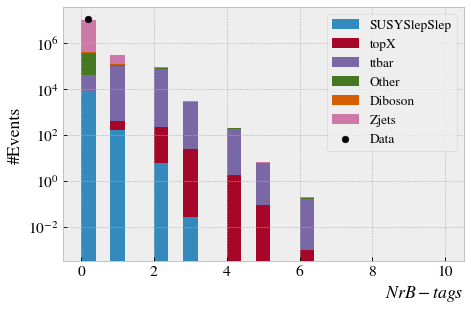

In [6]:
N, bins = np.histogram(df_data["lep1_pt"]/1000, bins = 25, range=(0,500))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
fig = plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
plt.xlabel(r"$P_t$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.yscale("log")
plt.hist(df_pt1, weights = weights, bins = 25, range=(0,500), histtype = "barstacked", stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/p_t1.pdf")
plt.show()


N, bins = np.histogram(df_data["lep2_pt"]/1000, bins = 25, range=(0,400))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$P_t$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_pt2, weights = weights, bins = 25, range=(0,400), stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/p_t2.pdf")
plt.show()

N, bins = np.histogram(df_data["met_et"]/1000, bins = 25, range=(0,300))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$\bar{E}_t$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_mep, weights = weights, bins = 25, range=(0,300), stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/MET.pdf")
plt.show()

N, bins = np.histogram(df_data["mll"]/1000, bins = 25, range=(25,300))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$m_{ll}$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_mll, weights = weights, bins = 25, range=(25,300), stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/mll.pdf")
plt.show()

N, bins = np.histogram(df_data["mt2"]/1000, bins = 25, range=(0,500))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$m{T2}$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_mt2, weights = weights, bins = 25, range=(0,500), stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/mT2.pdf")
plt.show()
"""
N, bins = np.histogram(df_data["nbjet77"]/1000, bins = 25, range=(0,10))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$Nr B-tags$", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_bTag, weights = weights, bins = 25, range=(0,10), stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/mT2.pdf")
plt.show()"""

In [7]:
import pickle
xgb = pickle.load(open("XGBoost_trained", "rb"))

## Cuts signal region

In [8]:
#Count number of SUSY before cuts
SUSY_index = df["category"] == "SUSYSlepSlep"
SUSY_events = df[SUSY_index]
SUSY_masses = df["physdescr"][SUSY_index].unique()
SUSY_nr_events_BC = {}
for i in range(len(SUSY_masses)):
    SUSY_nr_events_BC[SUSY_masses[i]] = np.sum(df["weight"][df["physdescr"] == SUSY_masses[i]].array)

In [9]:
df = df[((abs(df["mll"]-91.2*1000)>20*1000) & (df["mt2"] > 175*1000) & (df["met_et"] > 50*1000) & (df["lep1_pt"] > 80*1000) )]
df_data = df_data[((abs(df_data["mll"]-91.2*1000)>20*1000) & (df_data["mt2"] > 175*1000) & (df_data["met_et"] > 50*1000) & (df_data["lep1_pt"] > 80*1000) )]
df_category = df.category
df_weights = df.weight
df_physdescr = df.physdescr
for i in range(len(cats)):
    print(f"Nr of {cats[i]} events: {len(df[df_category == cats[i]])}")

Nr of SUSYSlepSlep events: 65741
Nr of topX events: 148012
Nr of ttbar events: 255787
Nr of Other events: 146999
Nr of Diboson events: 581888
Nr of Zjets events: 160380


In [10]:
df.drop(['category', 'channelNumber', 'physdescr', 'weight'],axis=1,inplace=True)
df_data.drop(['channelNumber',  'weight'],axis=1,inplace=True)

In [11]:
df_output = []
weights = []
nr_events = []
cats = ['Other' ,'Diboson' , 'ttbar', 'Zjets','topX']
#cats = ['Other' ,'Diboson' , 'ttbar', 'topX']


for i in range(len(cats)):
    index = df_category == cats[i]
    X_cat = np.array(df[index])
    weights.append(df_weights[index])
    df_output.append(xgb.predict_proba(X_cat)[:,1])
    nr_events.append(len(X_cat))

sort_indx = sorted(range(len(nr_events)), key=lambda k: nr_events[k])

df_output = [df_output[i] for i in sort_indx]
weights = [weights[i] for i in sort_indx]
cats = [cats[i] for i in sort_indx]
nr_events = [nr_events[i] for i in sort_indx]

for i in range(len(cats)):
    print(cats[i], nr_events[i])

Other 146999
topX 148012
Zjets 160380
ttbar 255787
Diboson 581888


In [12]:
xbg_pred_data = xgb.predict_proba(np.array(df_data))[:,1]
N, bins = np.histogram(xbg_pred_data, bins = 25, range=(0,1))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
threshold = 0.651032

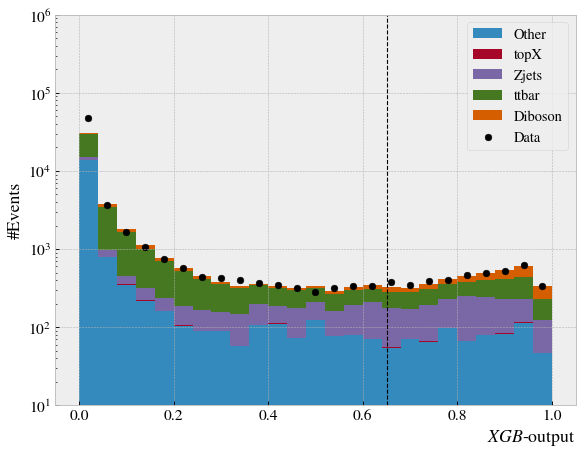

In [13]:
fig = plt.figure(figsize = (7.4, 5.8), num=0, dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
plt.xlabel(r"$XGB$-output", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.yscale("log")
plt.ylim([1e1,1e6])
plt.hist(df_output, weights = weights, bins = 25, range=(0,1), histtype = "barstacked", stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.axvline(x=threshold, color="black", linestyle="--", linewidth = 1.0)
plt.legend(fontsize=13)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/XGB_dist.pdf")
plt.show()

In [14]:
## Compare events in the signal region

In [15]:
n_obs = np.sum(np.array(xbg_pred_data>threshold))
print(len(xbg_pred_data))
bkg = 0
bkg_expt = 0
for i in range(len(df_output)):
    bkg += np.sum(weights[i][df_output[i]>threshold])
Limit = 175
print(f"n_obs: {n_obs} --- bkg: {int(bkg)}")
print(f"n_obs - bkg = {int(n_obs-bkg)}")
print(f"Limit: {Limit}")

63486
n_obs: 3845 --- bkg: 3778
n_obs - bkg = 66
Limit: 175


In [21]:
SUSY_index = df_category == "SUSYSlepSlep"
SUSY_events = df[SUSY_index]
SUSY_masses = df_physdescr[SUSY_index].unique()
SUSY_nr_events_AC = {}
CL_SB = []
effic = {}

In [22]:
for i in range(len(SUSY_masses)):
    mass_index = df_physdescr == SUSY_masses[i]
    X_mass = df[mass_index]
    weight_mass = df_weights[mass_index].array
    pred = xgb.predict_proba(X_mass)[:,1]
    SUSY_nr_events_AC[SUSY_masses[i]] = np.sum(weight_mass[np.array(pred>threshold)])
    effic[SUSY_masses[i]] = SUSY_nr_events_AC[SUSY_masses[i]]/SUSY_nr_events_BC[SUSY_masses[i]]
    print(f"{SUSY_masses[i]}: After Cuts {int(SUSY_nr_events_AC[SUSY_masses[i]])}, eff = {effic[SUSY_masses[i]]}")


SlepSlep_direct_200p5_1p0_2L8: After Cuts 277, eff = 0.6986132246010339
SlepSlep_direct_200p0_100p0_2L8: After Cuts 199, eff = 0.5408772838934798
SlepSlep_direct_500p5_1p0_2L8: After Cuts 7, eff = 0.9016784093428898
SlepSlep_direct_700p0_300p0_2L8: After Cuts 1, eff = 0.9171278076494801
SlepSlep_direct_600p0_300p0_2L8: After Cuts 2, eff = 0.8956624780223041
SlepSlep_direct_600p0_1p0_2L8: After Cuts 2, eff = 0.9237395475219059
SlepSlep_direct_700p0_1p0_2L8: After Cuts 1, eff = 0.9282291980361954
SlepSlep_direct_100p5_1p0_2L8: After Cuts 1309, eff = 0.3169181156624771
SlepSlep_direct_500p0_300p0_2L8: After Cuts 6, eff = 0.8322411082628659
SlepSlep_direct_500p0_100p0_2L8: After Cuts 6, eff = 0.899505705830392
SlepSlep_direct_300p0_200p0_2L8: After Cuts 42, eff = 0.5924201373667141
SlepSlep_direct_300p5_1p0_2L8: After Cuts 63, eff = 0.8313964812655756
SlepSlep_direct_100p0_50p0_2L8: After Cuts 735, eff = 0.19711524511222148
SlepSlep_direct_400p0_300p0_2L8: After Cuts 12, eff = 0.5862086068